In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Plots with IO time

## 1 MB file

### Sequential time computation

In [2]:
sequential_time = pd.read_csv('../results/seq_results_1MB.csv', index_col=None)

In [3]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [4]:
seq_time = sequential_time[0]
ideal_time = [[1, seq_time]]

for i in range (2, 33, 2):
    ideal_time.append([i, seq_time/i])

ideal_time = pd.DataFrame(ideal_time, columns=['number of threads', 'Completion time'])

### Native threads time computation

In [5]:
thread_time = pd.read_csv('../results/thread_results_1MB.csv', index_col=None)

In [6]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_completion = thread_time[thread_time['Completion time'] == 'Completion time']
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_completion

In [7]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()
thread_time_no_io = thread_time_no_io.groupby(thread_time_no_io.columns[-2])[thread_time_no_io.columns[-1]].mean()

### Fastflow time computation

In [8]:
ff_time = pd.read_csv('../results/ff_results_1MB.csv', index_col=None)

In [9]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_completion

In [10]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()
ff_time_no_io = ff_time_no_io.groupby(ff_time_no_io.columns[-2])[ff_time_no_io.columns[-1]].mean()

## Plots

### Completion time

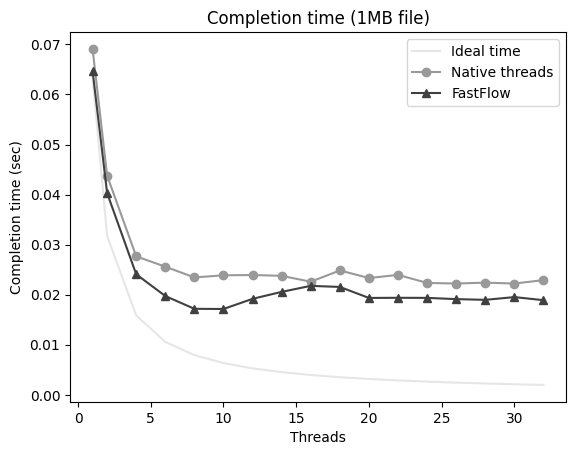

In [11]:
plt.plot(ideal_time['number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, marker='o', c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, marker='^', c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (1MB file)")
plt.savefig('Completion_1MB.png', bbox_inches='tight')
plt.show()

### Speedup

In [12]:
speedup_thread = []
speedup_ff = []

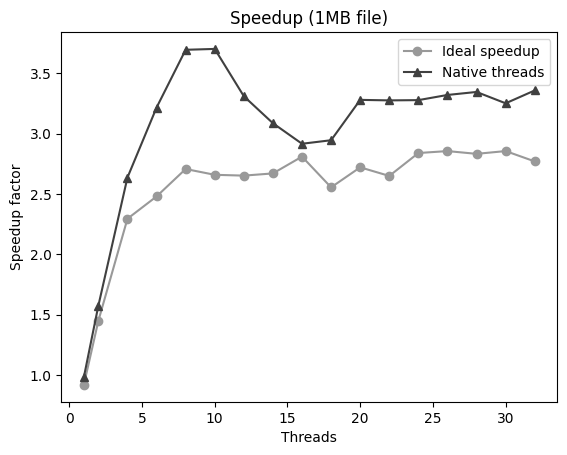

In [13]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], marker='o', c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], marker='^', c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (1MB file)")
plt.savefig('Speedup_1MB.png', bbox_inches='tight')
plt.show()

### Scalability

In [14]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

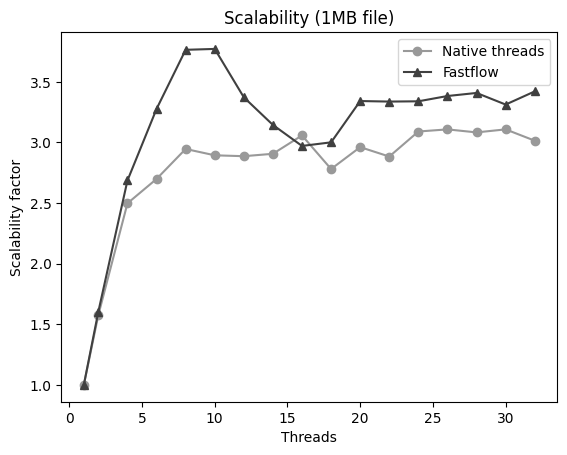

In [15]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], marker='o', c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], marker='^', c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (1MB file)")
plt.savefig('Scalability_1MB.png', bbox_inches='tight')
plt.show()

# 10 MB file

### Sequential time computation

In [16]:
sequential_time = pd.read_csv('../results/seq_results_10MB.csv', index_col=None)

In [17]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [18]:
seq_time = sequential_time[0]
ideal_time = [[1, seq_time]]

for i in range (2, 33, 2):
    ideal_time.append([i, seq_time/i])

ideal_time = pd.DataFrame(ideal_time, columns=['number of threads', 'Completion time'])

### Native threads time computation

In [19]:
thread_time = pd.read_csv('../results/thread_results_10MB.csv', index_col=None)

In [20]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_completion = thread_time[thread_time['Completion time'] == 'Completion time']
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_completion

In [21]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()
thread_time_no_io = thread_time_no_io.groupby(thread_time_no_io.columns[-2])[thread_time_no_io.columns[-1]].mean()

### Fastflow time computation

In [22]:
ff_time = pd.read_csv('../results/ff_results_10MB.csv', index_col=None)

In [23]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_completion

In [24]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()
ff_time_no_io = ff_time_no_io.groupby(ff_time_no_io.columns[-2])[ff_time_no_io.columns[-1]].mean()

## Plots

### Completion time

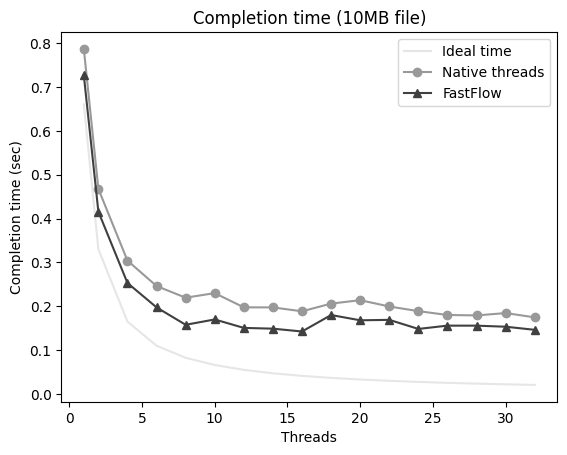

In [25]:
plt.plot(ideal_time['number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, marker='o', c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, marker='^', c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (10MB file)")
plt.savefig('Completion_10MB.png', bbox_inches='tight')
plt.show()

### Speedup

In [26]:
speedup_thread = []
speedup_ff = []

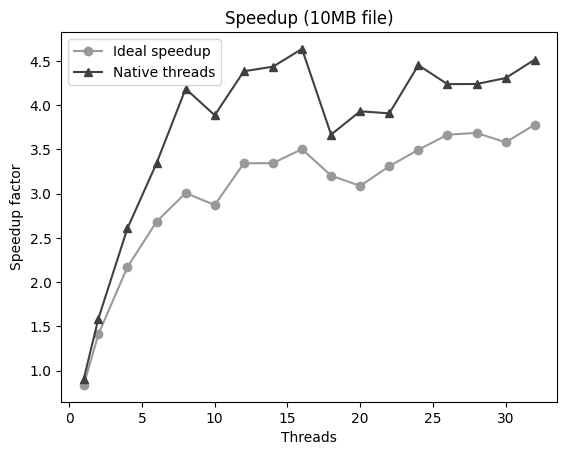

In [27]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], marker='o', c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], marker='^', c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (10MB file)")
plt.savefig('Speedup_10MB.png', bbox_inches='tight')
plt.show()

### Scalability

In [28]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

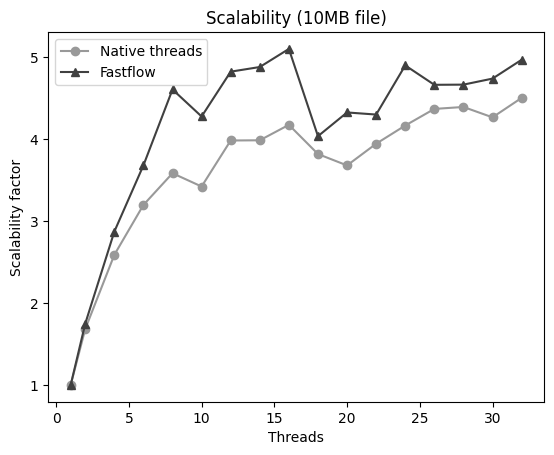

In [29]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], marker='o', c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], marker='^', c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (10MB file)")
plt.savefig('Scalability_10MB.png', bbox_inches='tight')
plt.show()

# 100 MB file

### Sequential time computation

In [30]:
sequential_time = pd.read_csv('../results/seq_results_100MB.csv', index_col=None)

In [31]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [32]:
seq_time = sequential_time[0]
ideal_time = [[1, seq_time]]

for i in range (2, 33, 2):
    ideal_time.append([i, seq_time/i])

ideal_time = pd.DataFrame(ideal_time, columns=['number of threads', 'Completion time'])

### Native threads time computation

In [33]:
thread_time = pd.read_csv('../results/thread_results_100MB.csv', index_col=None)

In [34]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_completion = thread_time[thread_time['Completion time'] == 'Completion time']
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_completion

In [35]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()
thread_time_no_io = thread_time_no_io.groupby(thread_time_no_io.columns[-2])[thread_time_no_io.columns[-1]].mean()

### Fastflow time computation

In [36]:
ff_time = pd.read_csv('../results/ff_results_100MB.csv', index_col=None)

In [37]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_completion

In [38]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()
ff_time_no_io = ff_time_no_io.groupby(ff_time_no_io.columns[-2])[ff_time_no_io.columns[-1]].mean()

## Plots

### Completion time

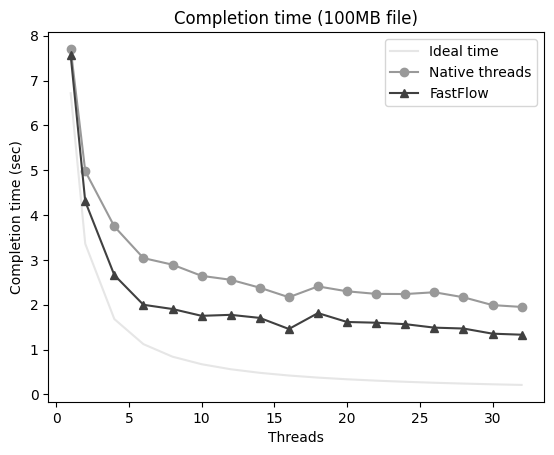

In [39]:
plt.plot(ideal_time['number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, marker='o', c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, marker='^', c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (100MB file)")
plt.savefig('Completion_100MB.png', bbox_inches='tight')
plt.show()

### Speedup

In [40]:
speedup_thread = []
speedup_ff = []

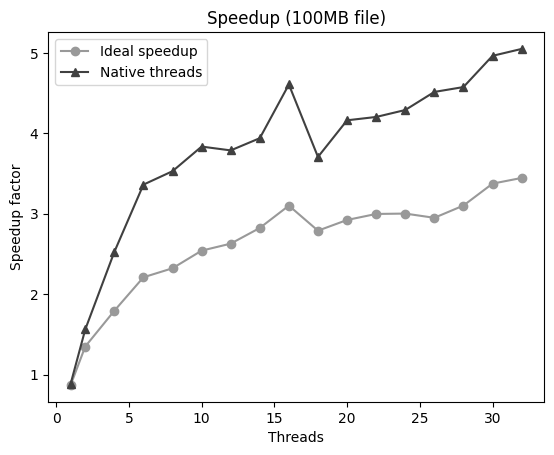

In [41]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], marker='o', c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], marker='^', c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (100MB file)")
plt.savefig('Speedup_100MB.png', bbox_inches='tight')
plt.show()

### Scalability

In [42]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

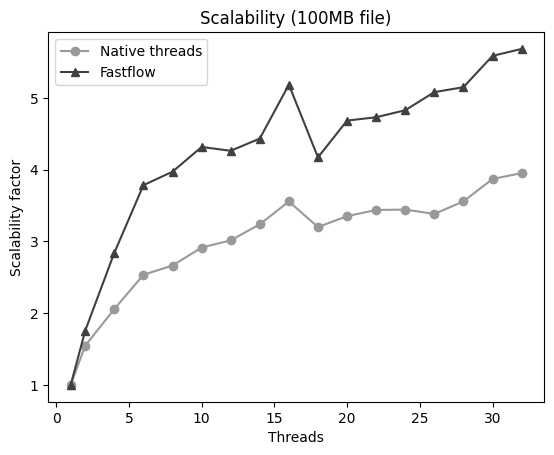

In [43]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], marker='o', c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], marker='^', c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (100MB file)")
plt.savefig('Scalability_100MB.png', bbox_inches='tight')
plt.show()

# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# Plots with no IO time

## 1 MB file

### Sequential time computation

In [44]:
sequential_time = pd.read_csv('../results/seq_results_1MB.csv', index_col=None)

In [45]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [46]:
seq_time = sequential_time[0]
ideal_time = [[1, seq_time]]

for i in range (2, 33, 2):
    ideal_time.append([i, seq_time/i])

ideal_time = pd.DataFrame(ideal_time, columns=['number of threads', 'Completion time'])

### Native threads time computation

In [47]:
thread_time = pd.read_csv('../results/thread_results_1MB.csv', index_col=None)

In [48]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_completion = thread_time[thread_time['Completion time'] == 'Completion time']
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_no_io

In [49]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()
thread_time_no_io = thread_time_no_io.groupby(thread_time_no_io.columns[-2])[thread_time_no_io.columns[-1]].mean()

### Fastflow time computation

In [50]:
ff_time = pd.read_csv('../results/ff_results_1MB.csv', index_col=None)

In [51]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_completion

In [52]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()
ff_time_no_io = ff_time_no_io.groupby(ff_time_no_io.columns[-2])[ff_time_no_io.columns[-1]].mean()

## Plots

### Completion time

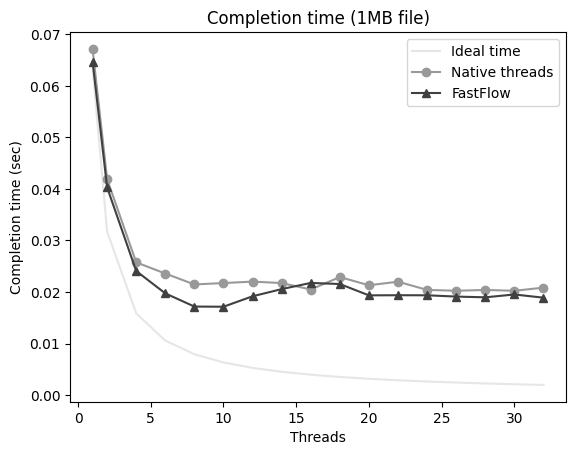

In [53]:
plt.plot(ideal_time['number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, marker='o', c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, marker='^', c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (1MB file)")
plt.savefig('Completion_1MB.png', bbox_inches='tight')
plt.show()

### Speedup

In [54]:
speedup_thread = []
speedup_ff = []

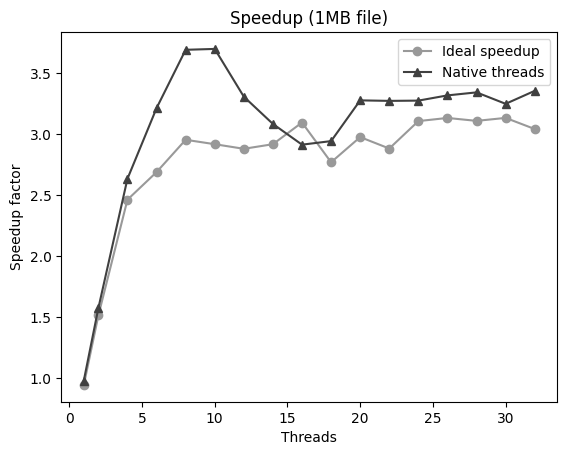

In [55]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], marker='o', c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], marker='^', c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (1MB file)")
plt.savefig('Speedup_1MB.png', bbox_inches='tight')
plt.show()

### Scalability

In [56]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

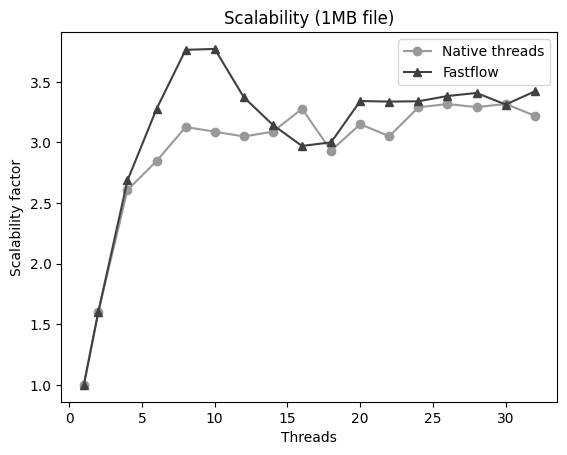

In [57]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], marker='o', c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], marker='^', c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (1MB file)")
plt.savefig('Scalability_1MB.png', bbox_inches='tight')
plt.show()

# 10 MB file

### Sequential time computation

In [58]:
sequential_time = pd.read_csv('../results/seq_results_10MB.csv', index_col=None)

In [59]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [60]:
seq_time = sequential_time[0]
ideal_time = [[1, seq_time]]

for i in range (2, 33, 2):
    ideal_time.append([i, seq_time/i])

ideal_time = pd.DataFrame(ideal_time, columns=['number of threads', 'Completion time'])

### Native threads time computation

In [61]:
thread_time = pd.read_csv('../results/thread_results_10MB.csv', index_col=None)

In [62]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_completion = thread_time[thread_time['Completion time'] == 'Completion time']
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_completion

In [63]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()
thread_time_no_io = thread_time_no_io.groupby(thread_time_no_io.columns[-2])[thread_time_no_io.columns[-1]].mean()

### Fastflow time computation

In [64]:
ff_time = pd.read_csv('../results/ff_results_10MB.csv', index_col=None)

In [65]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_completion

In [66]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()
ff_time_no_io = ff_time_no_io.groupby(ff_time_no_io.columns[-2])[ff_time_no_io.columns[-1]].mean()

## Plots

### Completion time

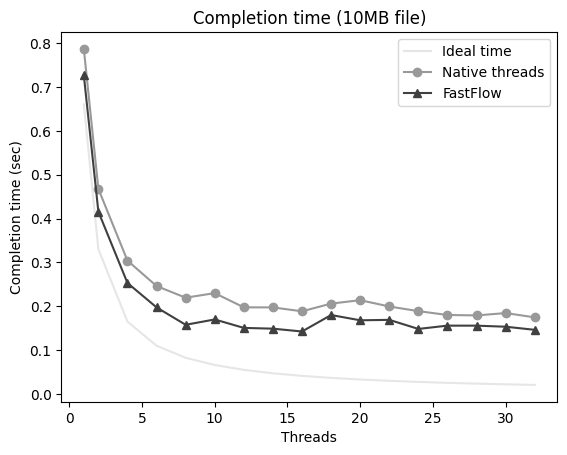

In [67]:
plt.plot(ideal_time['number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, marker='o', c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, marker='^', c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (10MB file)")
plt.savefig('Completion_10MB.png', bbox_inches='tight')
plt.show()

### Speedup

In [68]:
speedup_thread = []
speedup_ff = []

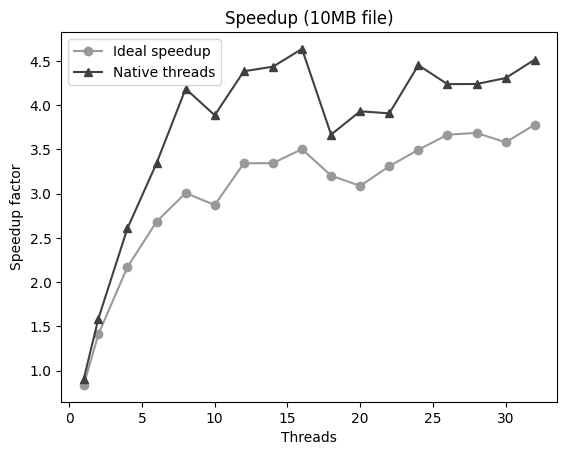

In [69]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], marker='o', c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], marker='^', c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (10MB file)")
plt.savefig('Speedup_10MB.png', bbox_inches='tight')
plt.show()

### Scalability

In [70]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

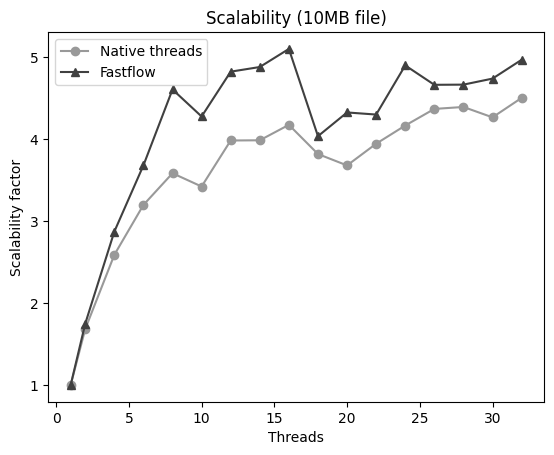

In [71]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], marker='o', c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], marker='^', c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (10MB file)")
plt.savefig('Scalability_10MB.png', bbox_inches='tight')
plt.show()

# 100 MB file

### Sequential time computation

In [72]:
sequential_time = pd.read_csv('../results/seq_results_100MB.csv', index_col=None)

In [73]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [74]:
seq_time = sequential_time[0]
ideal_time = [[1, seq_time]]

for i in range (2, 33, 2):
    ideal_time.append([i, seq_time/i])

ideal_time = pd.DataFrame(ideal_time, columns=['number of threads', 'Completion time'])

### Native threads time computation

In [75]:
thread_time = pd.read_csv('../results/thread_results_100MB.csv', index_col=None)

In [76]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_completion = thread_time[thread_time['Completion time'] == 'Completion time']
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_completion

In [77]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()
thread_time_no_io = thread_time_no_io.groupby(thread_time_no_io.columns[-2])[thread_time_no_io.columns[-1]].mean()

### Fastflow time computation

In [78]:
ff_time = pd.read_csv('../results/ff_results_100MB.csv', index_col=None)

In [79]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_completion

In [80]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()
ff_time_no_io = ff_time_no_io.groupby(ff_time_no_io.columns[-2])[ff_time_no_io.columns[-1]].mean()

## Plots

### Completion time

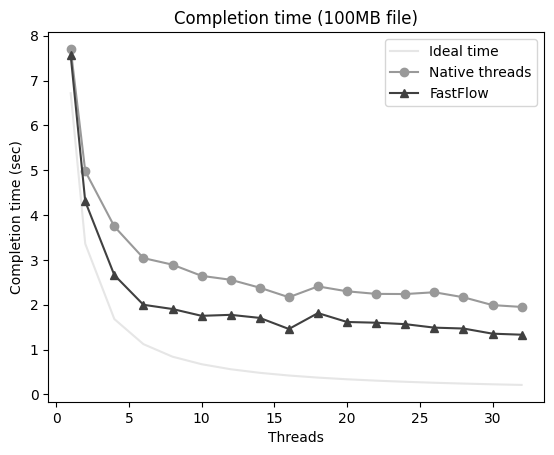

In [81]:
plt.plot(ideal_time['number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, marker='o', c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, marker='^', c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (100MB file)")
plt.savefig('Completion_100MB.png', bbox_inches='tight')
plt.show()

### Speedup

In [82]:
speedup_thread = []
speedup_ff = []

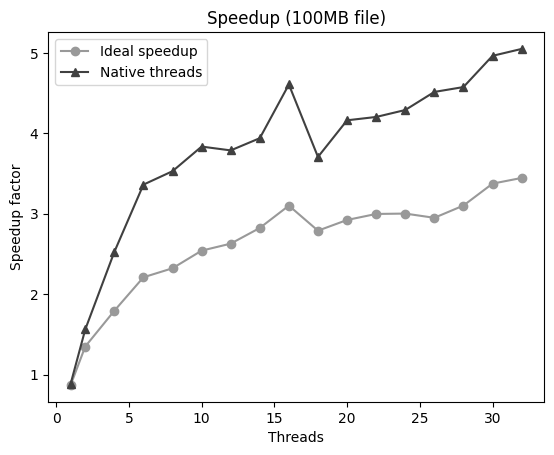

In [83]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], marker='o', c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], marker='^', c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (100MB file)")
plt.savefig('Speedup_100MB.png', bbox_inches='tight')
plt.show()

### Scalability

In [84]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

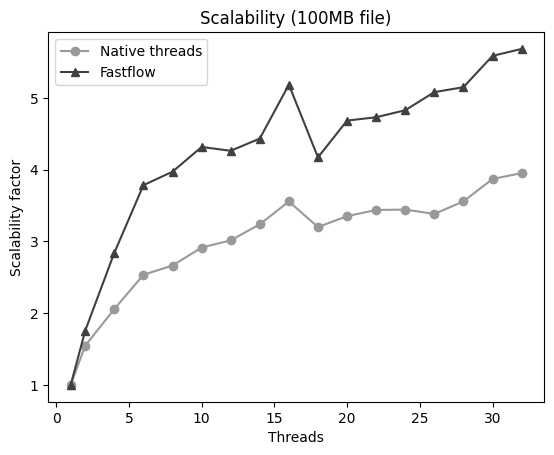

In [85]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], marker='o', c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], marker='^', c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (100MB file)")
plt.savefig('Scalability_100MB.png', bbox_inches='tight')
plt.show()